## Modules

In [157]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
script_path = os.path.abspath('../scripts')
sys.path.append(script_path)

In [159]:
import preprocessing_table

## Dataframe preprocessing

In [160]:
df = preprocessing_table.read_tables('../tables')
df

,30.00,40.00,50.00,h,35.00,45.00,55.00,25.00,20.50,25.50,30.50,35.50,35.5
0,22.75,31.85,38.30,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.90,31.50,38.20,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.75,31.30,38.45,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.75,31.40,38.55,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.65,31.40,38.45,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.8,19.20,23.7,NaN,27.05
81,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.9,19.40,23.8,NaN,27.60
82,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.7,19.55,23.3,NaN,27.70
83,NaN,NaN,NaN,15.05,NaN,NaN,NaN,NaN,13.6,19.10,23.5,NaN,27.50


In [161]:
tidy_df = preprocessing_table.tidy_table(df)
tidy_df

e:\Codes\uf\ic_physics\scripts\preprocessing_table.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tidy_df = tidy_df.applymap(float).sort_values(by='H')


,h,H,R
677,15.05,20.5,13.70
679,15.05,20.5,13.60
678,15.05,20.5,13.60
676,15.05,20.5,13.90
658,15.10,20.5,14.15
...,...,...,...
451,17.80,55.0,39.60
450,17.80,55.0,39.45
449,17.80,55.0,39.40
448,17.80,55.0,39.85


In [162]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [163]:
scaler = MinMaxScaler()
df_scaled = preprocessing_table.scale_table(tidy_df, scaler)

In [164]:
train_df, test_df = preprocessing_table.split_table(df_scaled, train_frac=0.8)
train_df

c:\Users\migue\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,h,H,R
187,0.929825,0.420290,0.519481
12,0.017544,0.000000,0.024119
145,0.017544,0.289855,0.376623
348,0.964912,1.000000,0.977737
274,0.929825,0.565217,0.649351
...,...,...,...
116,1.000000,0.275362,0.335807
203,0.964912,0.420290,0.499072
10,0.017544,0.000000,0.024119
279,0.929825,0.565217,0.638219


## Training the model

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<Axes: xlabel='H', ylabel='R'>

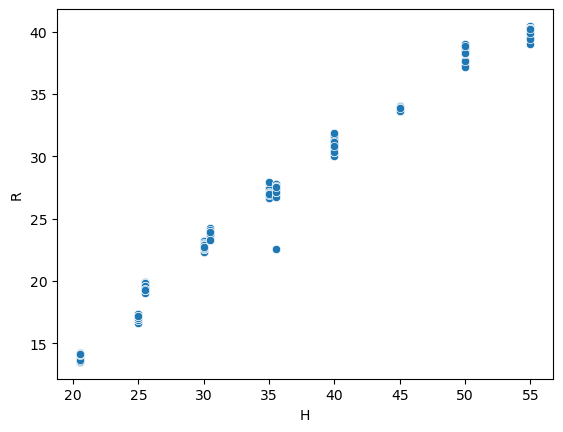

In [166]:
sns.scatterplot(data=tidy_df, x='H', y='R')

In [167]:
x_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
x_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

In [168]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [169]:
inverse_scaler_value_y = np.max(tidy_df.R.values)
inverse_scaler_value_x = np.max(tidy_df.H.values)

In [170]:
y_pred *= inverse_scaler_value_y
y_true = y_test * inverse_scaler_value_y

In [171]:
r2_score(y_true, y_pred), mean_squared_error(y_true, y_pred)

(0.9846472677099019, 2.0305195459520533)

In [172]:
H_plot = inverse_scaler_value_x * test_df.H.values

<Axes: ylabel='R'>

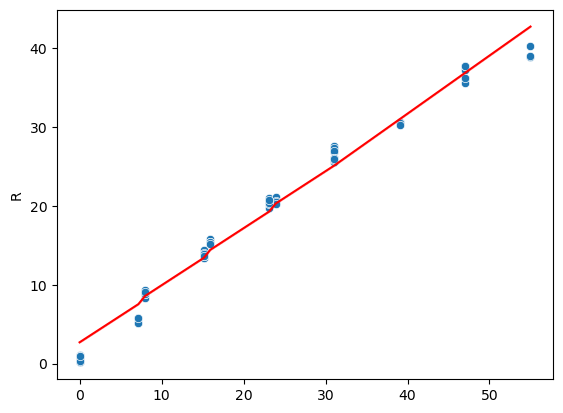

In [173]:
sns.scatterplot(x=H_plot, y=y_true)
sns.lineplot(x=H_plot, y=y_pred, color='red')

In [185]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [186]:
lr_trans = LinearRegression()
lr_trans.fit(x_train_trans, y_train)
y_pred_trans = lr_trans.predict(x_test_trans)

In [187]:
y_pred_trans *= inverse_scaler_value_y

In [188]:
r2_score(y_true, y_pred_trans), mean_squared_error(y_true, y_pred_trans)

(0.996965541175842, 0.40133103589733243)

<Axes: ylabel='R'>

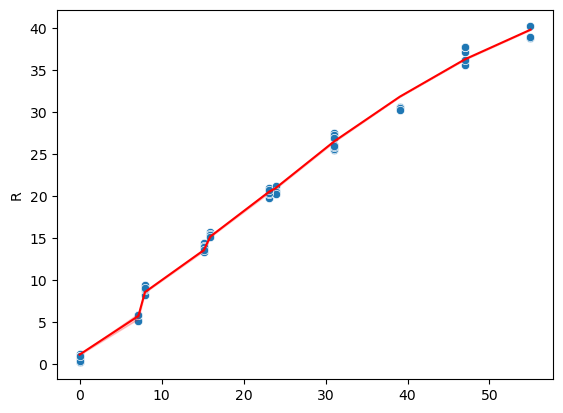

In [189]:
sns.scatterplot(x=H_plot, y=y_true)
sns.lineplot(x=H_plot, y=y_pred_trans, color='red')

<Axes: ylabel='R'>

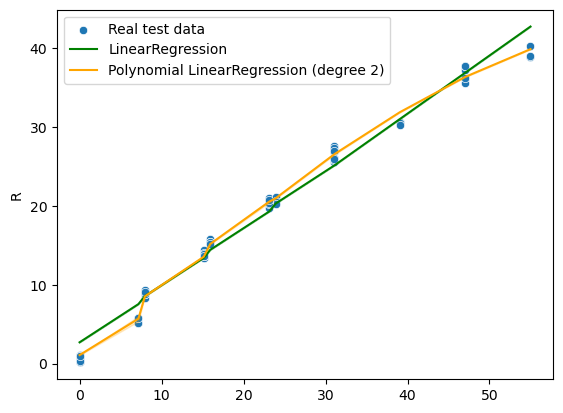

In [190]:
sns.scatterplot(x=H_plot, y=y_true, label='Real test data')
sns.lineplot(x=H_plot, y=y_pred, color='green', label="LinearRegression")
sns.lineplot(x=H_plot, y=y_pred_trans, color='orange', label="Polynomial LinearRegression (degree 2)")